<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022/blob/main/Projects/Numpy_Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**



In this project we will be using Numpy library to look for a correlation between time data and sea level rise. 



***Data Source***

Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015. Please find here: [link text](https://datahub.io/core/sea-level-rise)


The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA).  Raw Data file: [link text](https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv) 


The main idea for this worksheet we will analyse the dataset of the global average sea level change since 1880. We will also use the historical data to predict the sea level change through year 2050.


For this worksheet I will carry out the following tasks: 

*  import all the libraries such as pandas, numpy, seaborn, matplotlib and scipy.stats and plotly for visualizing our data.  

*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)

*  use df.head() and df.info() to inspect the data and the column data types

*   Use numpy function np.where() to calculate some statistics on the sea level array

*  Plot a scatter plot by using the Graph Objects to show how the sea levels have changed over time. 

*   Use the linear regression function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.


*   Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.







# **PART 1: Import libraries and dataset**

First, we will import all the libraries that will be needed for this project.   Then read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe and sign it to a new varible named sea_level_df. 

In [ ]:
#Import libraries 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import linregress

# read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
sea_level_df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
sea_level_df # print the dataset

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Next, we will use df.head(), df.info() and df.describe() to inspect the data and the column data types. 

In [ ]:
def get_summary():


  print(sea_level_df.head())# to print the first 5 rows of the dataset
  print(sea_level_df.info()) # to to print a concise summary of the dataframe.  This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
  print(sea_level_df.describe()) # to get the numerical summary

get_summary()

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    floa

**Observation:**


*   sea_level_df.head() outputs the first five rows of our DataFrame by default, but we could also pass a number as well: df.head(10) would output the top ten rows, for example.

*   sea_level_df.info() method prints information about the Dataframe. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).


*   sea_level_df.info() method output the total total number of rows are columns are 134 and 5. There are two datatypes, we have 4 float datatype columns and 1 integer cloumn in Year. Non-Null Count showed us there is 21 null values are missing in NOAA Adjusted Sea Level column.


*   sea_level_df.describe() function in pandas used to get the statistics of each feature present in our dataset. Some of the information we get include count, max, min, standard deviation, median, mean, upper and lower quartile values in each of the columns. In this case there are total 134 observations , the mean of sea level is 1946.5, the max value is 9.32776 and the min is -0.440945.





# **PART 2: Use numpy function np.where() to calculate some statistics on the sea level array**
---
1.  Calculate some statistics on the level array such as the following: 
    *  mean
    *  standard deviation
    *  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

    *  the year with the biggest rise in level
    *  the year with the lowest rise in level


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  

In [ ]:
from numpy.ma.core import maximum_fill_value
def get_levels(): 
  year = sea_level_df["Year"].to_numpy(np.int64)
  level =sea_level_df["CSIRO Adjusted Sea Level"].to_numpy(np.float64) # adding CSIRO ajusted colum

#Calculate mean, standard deviation, total
  Average_level = level.mean()
  Standard_deviation = level.std()
  sum = level.sum()
  Max = level.max()# highest sea level 
  Min = level.min() # lowest sea level
  print("Mean is:", Average_level, "Standard_deviation is:", Standard_deviation, "Total",sum, "Highest sea level is: ", Max, "Lowest sea level is: ",Min)


  # the year with the biggest rise in level
  higgest_sea_rise_year = np.where(sea_level_df == Max)[0][0]
  #the year with the lowest rise in level
  lowest_sea_rise_year = np.where(sea_level_df == Min)[0][0]
  print(year[higgest_sea_rise_year])
  print(year[lowest_sea_rise_year])


  #Calculate correlation coefficien between year and the rise in sea level
  coeff =np. corrcoef(year,level)
  #print(coeff)
  print(round(coeff[0][1],2)) # to round up to 2 decimal places
  
get_levels()


Mean is: 3.650340811880598 Standard_deviation is: 2.476399631426498 Total 489.1456687920001 Highest sea level is:  9.326771644 Lowest sea level is:  -0.440944881
2012
1882
0.98


# **PART 3: Scatterplot of Global Average Absolute Sea Level Change from 1880 to 2013**

In this part we are going to plot a scatter plot by using the Graph Objects to show how the sea level has changed over time. Here we will use the "Year" column as the x-axis and the " CSIRO Adjusted Sea Level" as y-axis, and "NOAA Adjusted Sea Level" column as the second y-axis. 



In [ ]:
def draw_plot(): 

  data = sea_level_df
  x = sea_level_df["Year"]
  y = sea_level_df["CSIRO Adjusted Sea Level"]
  y = sea_level_df["NOAA Adjusted Sea Level"]

  fig = go.Figure()
  #create the plot
  fig.add_trace(go.Scatter(x=sea_level_df["Year"], y=sea_level_df["CSIRO Adjusted Sea Level"], name="CSIRO Adjusted Sea Level")) 
  fig.add_trace(go.Scatter(x=sea_level_df["Year"], y=sea_level_df["NOAA Adjusted Sea Level"], name="NOAA Adjusted Sea Level"))
  # to add the title, xaxis & yaxis titles, and the to design the size for the graph
  fig.update_layout(title="Global Average Absolute Sea Level Change from 1880 to 2013",  xaxis_title= "Year",
    yaxis_title ="Cumulative Sea Level change(inches)", width = 1000, height = 600)
  fig.show()

draw_plot()

The image above shows trends in global average absolute sea level from 1880 to 2013 based on a combination of long-term tide gauge measurements and recent satellite measurement. From the EPA [link text](https://) the US EPA (2014): "*This figure shows average absolute sea level change, which refers to the height of the ocean surface, regardless of whether nearby land is rising or falling. Satellite data are based solely on measured sea level, while the long-term tide gauge data include a small correction factor because the size and shape of the oceans are changing slowly over time.*" 

The graph output shows a gradully risen sea level since 1880. This can be attributed to the globle warming factors. The graph potins the lowest sea level is -0.4409449 inches in 1882 and the highest see level year 2012 with the value of 9.326772 inches as we worked out in Part 3. 

Global average sea level rose throughout the 20th century, and the rate of change has accelerated in recent years. When averaged over all of the world’s oceans, absolute sea level has risen at an average rate of 0.06 inches per year from 1880 to 2013. Since 1993, however, average sea level has risen at a rate of 0.12 to 0.14 inches per year—roughly twice as fast as the long-term trend.



# **PART 4: Global Average Absolute Sea Level Prediction for year 2050**

The idea of this project is to analyse the global average sea level since 1880, and predict the sea level growth at 2050. The behaviour of the sea level has been approximately linear between 1880 and 2013, for this reason we consider a linear least-squares regression. In order to analyse future sea level values we made an adjustment in the last decade due to an explosive growth in this period.

We will perform a liner least-squeares regression from the sciPy package aviable here: [link text](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


With this linear function, we are able to predict the sea level behaviour. To see if it is correct we can check the fit in to the data plotting the data and the linear regression. We use the statistical data visualization package Seaborn.

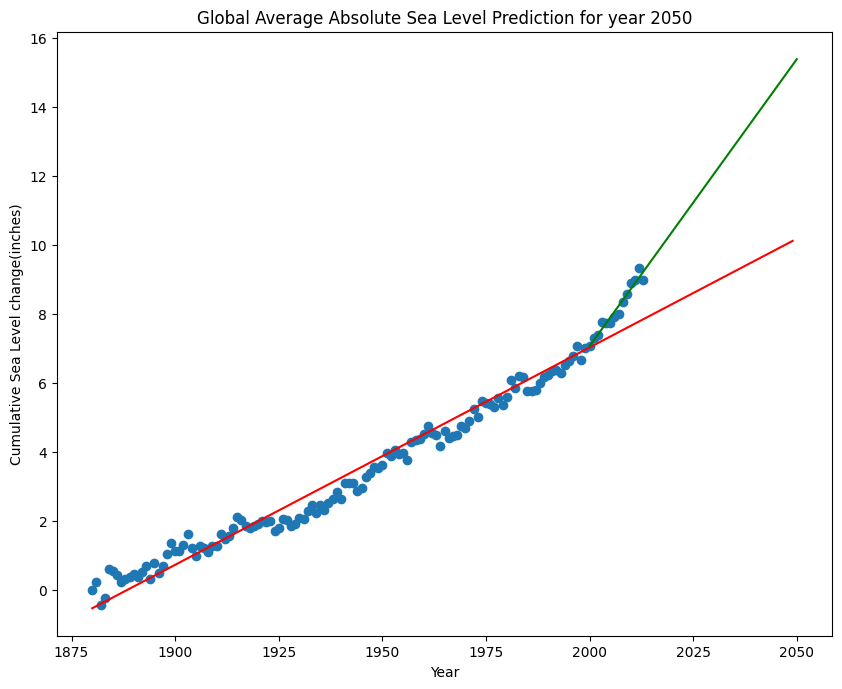

In [ ]:
def draw_plot(): 

  plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})


  data = sea_level_df
  x = sea_level_df["Year"]
  y = sea_level_df["CSIRO Adjusted Sea Level"]

  # create scatter plot 
  fig,ax = plt.subplots()
  plt.scatter(x, y) 

  #create first line of best fit 
  reg  = linregress (x,y)
  # print(reg)
  x_pred = pd.Series([int(i) for i in range(1880, 2050)])
  y_pred = reg.slope* x_pred + reg.intercept
  plt.plot(x_pred, y_pred,"red")

  # plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
  # make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
  # create the second line of best fit 
  new_sea_level_df = sea_level_df.loc[sea_level_df["Year"]>=2000]
  new_x = new_sea_level_df ["Year"]
  new_y = new_sea_level_df ["CSIRO Adjusted Sea Level" ]
  reg_2 = linregress(new_x, new_y)

  x_pred2 = pd.Series([i for i in range (2000, 2051)])
  y_pred2 = reg_2.slope* x_pred2 + reg_2.intercept 
  plt.plot(x_pred2, y_pred2, "Green")
  

  # add labels and tiltes 
  ax.set_xlabel ("Year") # add an x_lable to the axes
  ax.set_ylabel("Cumulative Sea Level change(inches)")# add an y_lable to the axes
  ax.set_title("Global Average Absolute Sea Level Prediction for year 2050") # add the tilte for the graph 
  
  plt.show()
  return reg_2, x_pred2

reg_2, x_pred2 = draw_plot()



We can see that the fit of the linear function is correct, and the data shows an expontial increase in rising sea levels from the year 2000, compared to previous years. This  indicates that current enviromental conditions will have an adverse impact on sea levels. Studies show that as global temperatures continue to warm, rapid sea level rises will be inevitable.

 

**Sea Level Prediction for year 2050**

In [ ]:
y_pred2 = reg_2.slope*2050 + reg_2.intercept 
print(y_pred2)


15.382443524364874


In [ ]:
def sea_level_df(year, slope, intercept):

  y_pred2 = slope* x_pred2 + intercept  
  return y_pred2

prediction = sea_level_df(2050, reg_2.slope, reg_2.intercept)
print(prediction)# print the list of the predicted values 
#print(prediction[-5:]) # to print the last 5 rows of data

0      7.061080
1      7.227507
2      7.393934
3      7.560362
4      7.726789
5      7.893216
6      8.059643
7      8.226071
8      8.392498
9      8.558925
10     8.725353
11     8.891780
12     9.058207
13     9.224634
14     9.391062
15     9.557489
16     9.723916
17     9.890344
18    10.056771
19    10.223198
20    10.389625
21    10.556053
22    10.722480
23    10.888907
24    11.055334
25    11.221762
26    11.388189
27    11.554616
28    11.721044
29    11.887471
30    12.053898
31    12.220325
32    12.386753
33    12.553180
34    12.719607
35    12.886034
36    13.052462
37    13.218889
38    13.385316
39    13.551744
40    13.718171
41    13.884598
42    14.051025
43    14.217453
44    14.383880
45    14.550307
46    14.716734
47    14.883162
48    15.049589
49    15.216016
50    15.382444
dtype: float64


Regression analysis has been used to predict the values of rising sea levels up to the year 2050. The first model calculates the singular value of sea level in the year 2050 which is predicted at 15.38 inches. In the second function, the results are determined chronologically with the resulting sea level rise at 2050 predicted as 15.38 inches which agrees with the first calculation as noted above. 

# **Summary**


From this project it is noted that the the lowest sea level is -0.4409449 in 1882, while in 2012, global sea levels have reached their highest record with 9.326772 inches above 1880 levels. This indicates that global mean sea levels have risen by about 8-9 inches since 1880. 


The rate of sea level rise is accelerating and based on the above results by 2050 sea levels are predicted to be 15.38 inches. 


Whilst the prediction is function of the regression analysis many factors will influence the actual rate of change in sea levels. Some such factors could be government intervention, reduction of fossil fuel useage and other factors that will reduce greenhouse gas emmissions. 






# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: 


*   Learnt how to import libraries such as pandas, numpy, seaborn, matplotlib and scipy.stats and plotly for extracting and visualizing the data.

*   Used df.head() and df.info() to inspect the data and the column data types


*   Used numpy function *np.where() *to calculate some statistics on the sea level array


*   Plotted a scatter plot by using the Graph Objects to show how the sea levels have changed over time.


*   Used the linear regression function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.


*   Plotted a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.





## What caused you the most difficulty?

Your answer: 

The most challenging aspect of this project was to add two legends for two verables, on the first attempt only one legend was showing however, after defining the second y axis and  adding an additional line in my code for the additional y_varibale. 